## Validation of Basic Optical Properties
This notebook will run a series of calculations to validate the transfer matrix routines
used to compute reflectivity, transmissivity, and emissivity as a function of wavelength and angle.


### Optical properties of noble metal films
#### Reflectivity, Transmissivity, and Emissivity vs wavelength for 50 nm gold

In [1]:
from wptherml.wpml import multilayer
from wptherml.datalib import datalib
from matplotlib import pyplot as plt
import numpy as np

''' In the following examples, we will compute the reflectivity, transmissivity, and absorptivity/emissivity
    of simple noble metal films.  Validation data was obtained using S. Byrnes tmm program, 
    which can be obtained from: https://github.com/sbyrnes321/tmm '''

### dictionary that stores basic properties 
### of the multilayer structure you want to simulate
structure = {
        ### computation mode - inline means the structure and calculation
        ### type will be determined from the values of this dictionary
        'mode': 'Inline',
        ### temperature of the structure - relevant for all thermal applications
        ### value is stored in attribute self.T
        'Temperature': 300,
        ### gold film with air above and belo
        'Material_List': ['Air', 'Au', 'Air'],
        ### gold film is 50 nm thick
        'Thickness_List': [0, 50e-9, 0],
         ### range of wavelengths optical properties will be calculated for
         ### values are stored in the array self.lam
        'Lambda_List': [200e-9, 1000e-9, 1000]
        }

gold_film = multilayer(structure)

### get validation data for first validation case - 50 nm Au film
gold_film.validation_option = 1
gold_film.get_validation_data()



plt.plot(1e9*gold_film.lambda_array, gold_film.reflectivity_array, 'red', label='WPTherml')
plt.plot(1e9*gold_film.valid_lambda_array, gold_film.valid_reflectivity_array, 'b--', label='Validation')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectivity (Arb. units)")
plt.legend()
plt.show()

### plot wptherml transmissivity with red lines, validation data with blue dashed lines
plt.plot(1e9*gold_film.lambda_array, gold_film.transmissivity_array, 'red', label='WPTherml')
plt.plot(1e9*gold_film.valid_lambda_array, gold_film.valid_transmissivity_array, 'b--', label='Validation')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmissivity (arb. units)")
plt.legend()
plt.show()

### plot wptherml emissivity with red lines, validation data with blue dashed lines
plt.plot(1e9*gold_film.lambda_array, gold_film.emissivity_array, 'red', label='WPTherml')
plt.plot(1e9*gold_film.valid_lambda_array, gold_film.valid_emissivity_array, 'b--', label='Validation')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Emissivity (arb. units)")
plt.legend()
plt.show()



<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

#### Reflection vs angle for 50 nm gold atop semi-infinite glass at $\lambda = 616 nm$

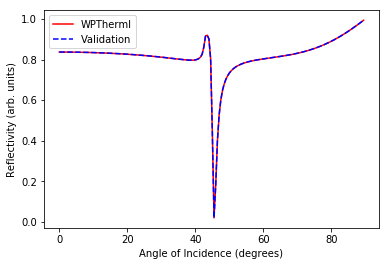

In [2]:
### of the multilayer structure you want to simulate
structure = {
        ### computation mode - inline means the structure and calculation
        ### type will be determined from the values of this dictionary
        'mode': 'Inline',
        ### temperature of the structure - relevant for all thermal applications
        ### value is stored in attribute self.T
        'Temperature': 300,
        ### gold film with air above and belo
        'Material_List': ['SiO2', 'Au', 'Air'],
        ### gold film is 50 nm thick
        'Thickness_List': [0, 50e-9, 0],
         ### range of wavelengths optical properties will be calculated for
         ### values are stored in the array self.lam
        'Lambda_List': [200e-9, 1000e-9, 5000]
        }

gold_film = multilayer(structure)




### use the angular_fresnel method of the multilayer class to compute 
### the reflectivity vs angle for the gold_slab structure at a specified wavelength (in SI units)
gold_film.angular_fresnel(616e-9)

### get the validation data for case 2 - 50 nm Au at 616 nm
gold_film.validation_option = 2
gold_film.get_validation_data()


plt.plot(gold_film.theta_array*180./np.pi, gold_film.r_vs_theta, 'red', label="WPTherml")
plt.plot(gold_film.valid_theta_array, gold_film.valid_ref_vs_theta, 'b--', label="Validation")
plt.xlabel("Angle of Incidence (degrees)")
plt.ylabel("Reflectivity (arb. units)")
plt.legend()
plt.show()


#### Reflectivity, Transmissivity, and Emissivity vs angle for 50 nm gold at $\lambda = 616 nm$

### Optical properties of Critically-Coupled Stack

In [3]:
''' In this example we will reproduce the emissivity, reflectivity, and transmissivity 
    of the structure illustrated in Figure 3 of Adv. Energy Mater. 2018, 1801035 '''

### dictionary that stores basic properties 
### of the multilayer structure you want to simulate

structure = {
        ### temperature of the structure - relevant for all thermal applications
        ### value is stored in attribute self.T
        'Temperature': 1700,
        ### initial material list will be *almost* what we want to model to 
        ### reproduce Fig. 3... we will need to make layer 1 an alloy after instantiation
        ### and give the RIs static values, as was done in the AEM paper
        'Material_List': ['Air', 'Al2O3', 'SiO2', 'TiO2', 'SiO2', 'Al2O3', 'W', 'Air'],
        ### these are the thicknesses of the structure in Fig. 3
        'Thickness_List': [0, 20e-9, 255e-9, 150e-9, 255e-9, 10e-9, 900e-9, 0],
         ### range of wavelengths optical properties will be calculated for
         ### values are stored in the array self.lam
        'Lambda_List': [400e-9, 6000e-9, 1000]
        }

### create the instance called glass_slab
fig_3 = multilayer(structure)
### make layer 1 an alloy of alumina and W where volume fraction
### of W is 0.75
fig_3.layer_alloy(1, 0.75, 1.66+0j, 'W', 'MaxwellGarnett')

### make all dielectric layers have fixed RI
fig_3.layer_static_ri(2, 1.45+0j)
fig_3.layer_static_ri(3, 2.10+0j)
fig_3.layer_static_ri(4, 1.45+0j)
fig_3.layer_static_ri(5, 1.66+0j)

fig_3.fresnel()
fig_3.validation_option = 3
fig_3.get_validation_data()




1

Upon instantiation, the basic optical properties (reflectivity, transmissivity, absorptivity/emissivity) are computed using the method $self.Fresnel()$ and stored as attributes $self.Reflectivity$, $self.Transmissivity$, $self.Emissivity$.  We will plot them as a function 
of wavelength in nanometers using pyplot in the following lines.  Note that we store all quantities in SI units, so we will multiply all values of $self.lam$ by $10^9 nm/m$ to convert the wavelengths to nanometers.

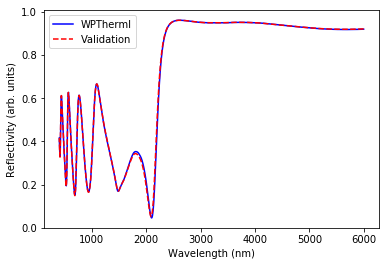

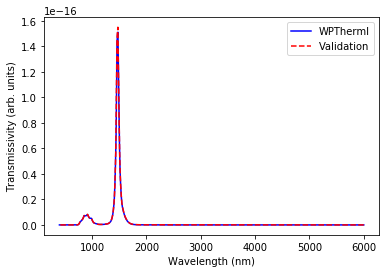

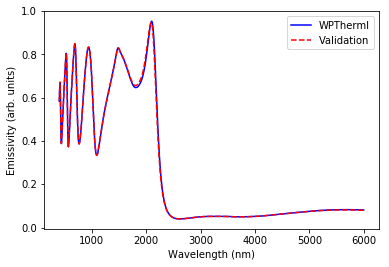

In [4]:

plt.plot(1e9*fig_3.lambda_array, fig_3.reflectivity_array, 'blue', label='WPTherml')
plt.plot(1e9*fig_3.valid_lambda_array, fig_3.valid_reflectivity_array, 'r--', label='Validation')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectivity (arb. units)")
plt.legend()
plt.show()

### Plot wptherml T vs validation T
plt.plot(1e9*fig_3.lambda_array, fig_3.transmissivity_array, 'blue', label='WPTherml')
plt.plot(1e9*fig_3.valid_lambda_array, fig_3.valid_transmissivity_array, 'r--', label='Validation')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmissivity (arb. units)")
plt.legend()
plt.show()

### Plot wptherml E vs validation E
plt.plot(1e9*fig_3.lambda_array, fig_3.emissivity_array, 'blue', label='WPTherml')
plt.plot(1e9*fig_3.valid_lambda_array, fig_3.valid_emissivity_array, 'r--', label='Validation')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Emissivity (arb. units)")
plt.legend()
plt.show()


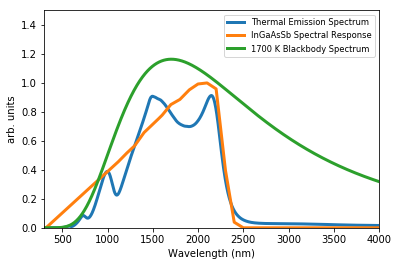

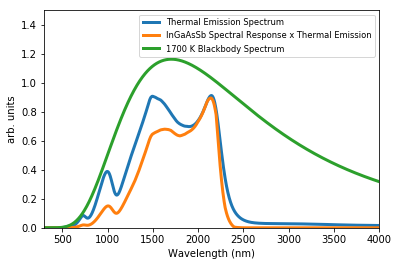

In [5]:
structure = {
        ### temperature of the structure - relevant for all thermal applications
        ### value is stored in attribute self.T
        'Temperature': 1700,
        ### initial material list will be *almost* what we want to model to 
        ### reproduce Fig. 3... we will need to make layer 1 an alloy after instantiation
        ### and give the RIs static values, as was done in the AEM paper
        'Material_List': ['Air', 'Al2O3', 'SiO2', 'TiO2', 'SiO2', 'Al2O3', 'W', 'Air'],
        ### these are the thicknesses of the structure in Fig. 3
        'Thickness_List': [0, 20e-9, 255e-9, 150e-9, 255e-9, 10e-9, 900e-9, 0],
         ### range of wavelengths optical properties will be calculated for
         ### values are stored in the array self.lam
        'Lambda_List': [300e-9, 4000e-9, 1000]
        }

### create the instance called glass_slab
fig_4 = multilayer(structure)
### make layer 1 an alloy of alumina and W where volume fraction
### of W is 0.75
fig_4.layer_alloy(1, 0.75, 1.66+0j, 'W', 'MaxwellGarnett')

### make all dielectric layers have fixed RI


fig_4.fresnel()
fig_4.validation_option = 3
fig_4.get_validation_data()



fig_4.thermal_emission()
Spec = datalib.SR_InGaAsSb(fig_4.lambda_array)
plt.plot(1e9*fig_4.lambda_array, fig_4.thermal_emission_array/ 5e10, label = "Thermal Emission Spectrum", linewidth = 3)
plt.plot(1e9*fig_4.lambda_array, Spec, label = "InGaAsSb Spectral Response", linewidth = 3)
plt.plot(1e9*fig_4.lambda_array, fig_4.BBs/5e10, label = "1700 K Blackbody Spectrum",linewidth = 3)
plt.ylim(0, 1.5)
plt.xlim(300,4000)
plt.xlabel("Wavelength (nm)")
plt.ylabel("arb. units")
plt.legend(loc = 'best', fontsize = "small")
plt.show()

plt.plot(1e9*fig_4.lambda_array, fig_4.thermal_emission_array/ 5e10, label = "Thermal Emission Spectrum", linewidth = 3)
plt.plot(1e9*fig_4.lambda_array, Spec*(fig_4.thermal_emission_array/5e10), label = "InGaAsSb Spectral Response x Thermal Emission", linewidth = 3)
plt.plot(1e9*fig_4.lambda_array, fig_4.BBs/5e10, label = "1700 K Blackbody Spectrum", linewidth = 3)
plt.ylim(0, 1.5)
plt.xlim(300,4000)
plt.xlabel("Wavelength (nm)")
plt.ylabel("arb. units")
plt.legend(loc = 'best', fontsize = "small")
plt.show()

We can also call a method called $AmbientColor$ to render the color of this structure.

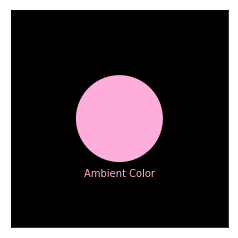

1

In [6]:
fig_3.ambient_color()